<a href="https://colab.research.google.com/github/ToyTeX/NumericalNotebooks/blob/main/ImageCompression5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import files
files.upload()

Saving rowdy_thumbs_up_gray.jpg to rowdy_thumbs_up_gray.jpg


{'rowdy_thumbs_up_gray.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xc0\x00\x0b\x08\x03u\x04\xb0\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8

['.config', 'rowdy_thumbs_up_gray.jpg', 'sample_data']


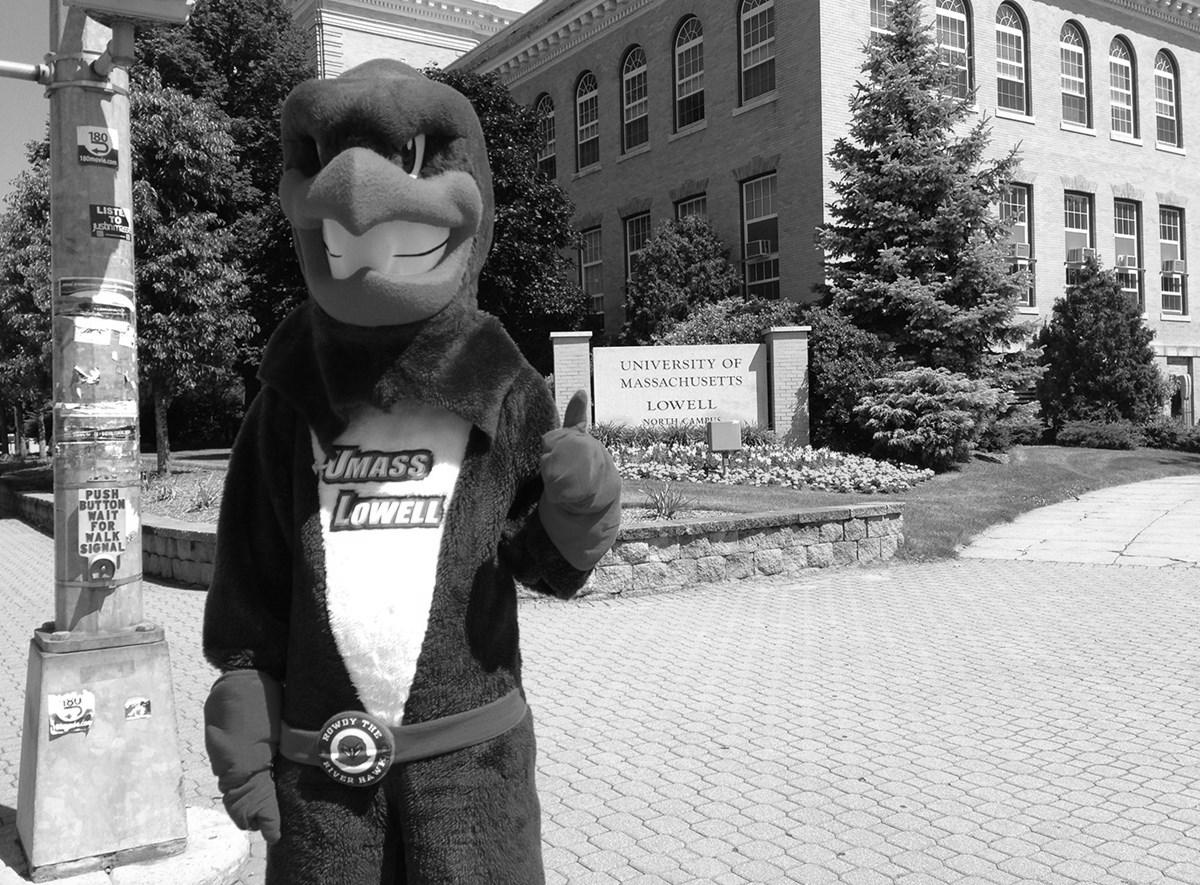

Image size: 209.0498046875 KB


In [ ]:
import os
print(os.listdir())

from IPython.display import Image, display
import os

# Define the path to the directory containing the images
image_dir = "." # Set image_dir to the current directory

# Define the filename of the image
image_filename = "rowdy_thumbs_up_gray.jpg"

# Define the full path to the image
image_path = os.path.join(image_dir, image_filename)


# Show the image
display(Image(filename=image_path))
print("Image size:", os.path.getsize(image_path)/1024, "KB")

In [ ]:
# Read the grayscale image
img = cv2.imread('rowdy_thumbs_up_gray.jpg', cv2.IMREAD_GRAYSCALE)

#SVD channels
def svd_compress_channel(channel, k):
    U, S, VT = np.linalg.svd(channel, full_matrices=False)
    S_k = np.zeros((k, k))
    np.fill_diagonal(S_k, S[:k])
    compressed = U[:, :k] @ S_k @ VT[:k, :]
    compressed = np.clip(compressed, 0, 255)
    return compressed.astype(np.uint8)

def svd_compress_color_image(image, k):
    # Split the image into color channels
    b, g, r = cv2.split(image)

    # Compress each channel
    compressed_b = svd_compress_channel(b, k)
    compressed_g = svd_compress_channel(g, k)
    compressed_r = svd_compress_channel(r, k)

    # Merge the compressed channels back
    compressed_image = cv2.merge((compressed_b, compressed_g, compressed_r))
    return compressed_image

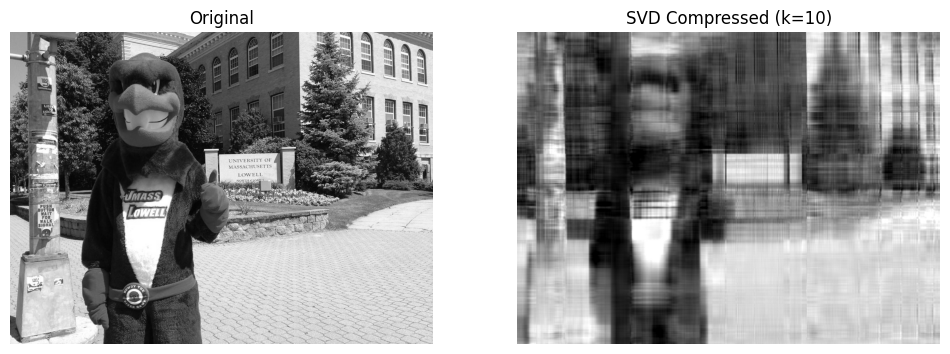

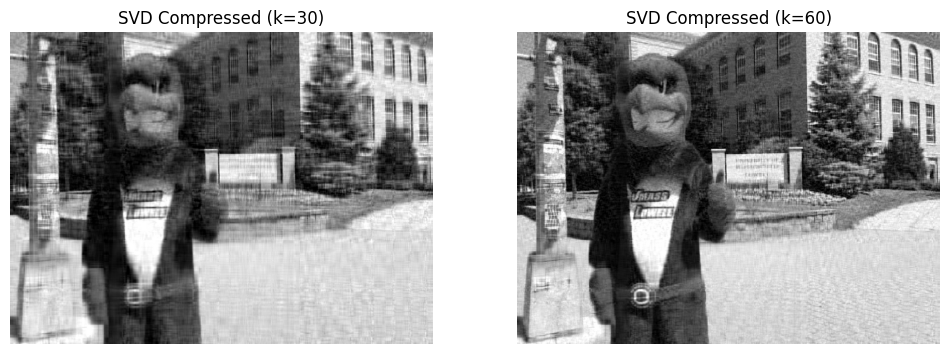

In [ ]:
k = 10  # Adjust k for more/less compression

compressed_img = svd_compress_channel(img, k)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f"SVD Compressed (k={k})")
plt.imshow(compressed_img, cmap='gray')
plt.axis('off')
plt.show()


k = 30  # Adjust k

compressed_img_k30 = svd_compress_channel(img, k)

k = 60  # Adjust k
compressed_img_k60 = svd_compress_channel(img, k)


plt.figure(figsize=(12, 12))


plt.subplot(2, 2, 1)
plt.title(f"SVD Compressed (k=30)")
plt.imshow(compressed_img_k30, cmap='gray')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.title(f"SVD Compressed (k=60)")
plt.imshow(compressed_img_k60, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
# Compute relative error and compression ratio
def compute_metrics(img, k):
    U, S, VT = np.linalg.svd(img, full_matrices=False)
    relative_error = S[k] / S[0]
    original_size = img.shape[0] * img.shape[1]
    compressed_size = (img.shape[0] * k) + k + (k * img.shape[1])
    compression_ratio = original_size / compressed_size
    return relative_error, compression_ratio

k_values = [10, 30, 60]
metrics = []
for k in k_values:
    relative_error, compression_ratio = compute_metrics(img, k)
    metrics.append({'k': k, 'Relative Error (σk+1/σ1)': relative_error, 'Compression Ratio': compression_ratio})

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

k  Relative Error (σk+1/σ1)  Compression Ratio
0  10                  0.045558          50.910834
1  30                  0.021980          16.970278
2  60                  0.014196           8.485139

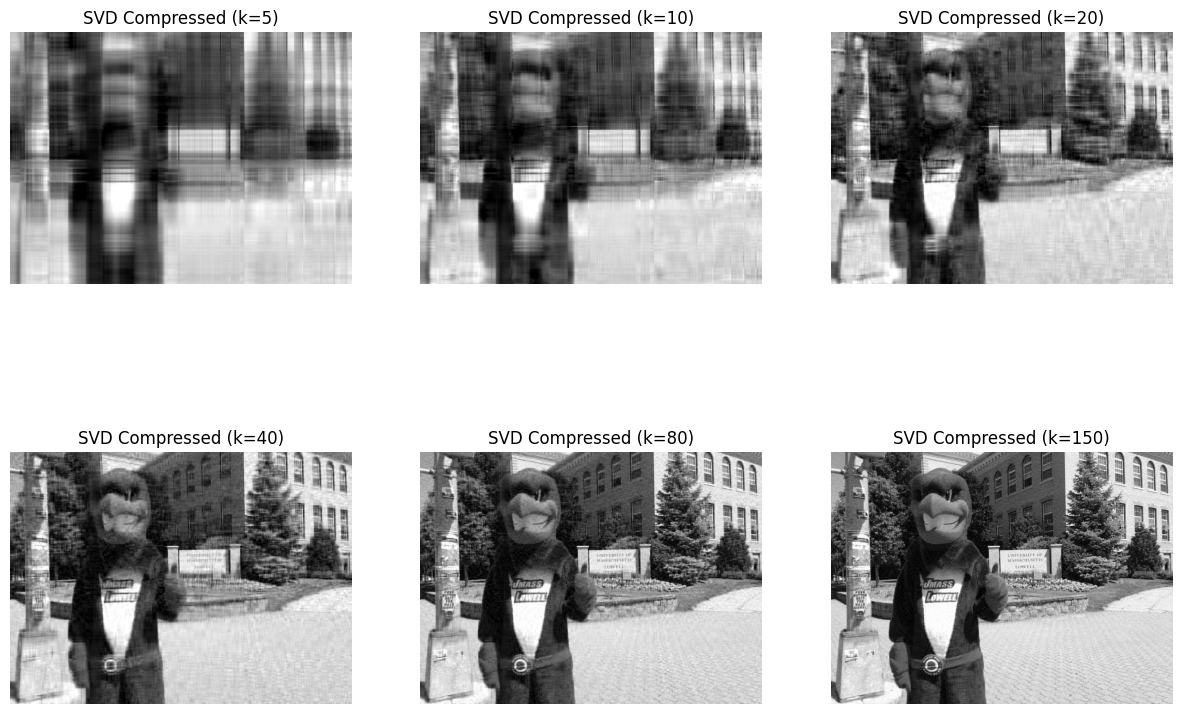

In [ ]:
k_values_experiment = [5, 10, 20, 40, 80, 150] # Experiment with different k values

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values_experiment):
    compressed_img_exp = svd_compress_channel(img, k)

    plt.subplot(2, 3, i + 1)
    plt.title(f"SVD Compressed (k={k})")
    plt.imshow(compressed_img_exp, cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
k_chosen = 150
relative_error_chosen, compression_ratio_chosen = compute_metrics(img, k_chosen)

print(f"Metrics for k = {k_chosen}:")
print(f"Relative Error (σk+1/σ1): {relative_error_chosen}")
print(f"Compression Ratio: {compression_ratio_chosen}")

Metrics for k = 150:
Relative Error (σk+1/σ1): 0.00767480818189749
Compression Ratio: 3.3940556088207097


Based on the visual inspection and the computed metrics for k=150:

- The compressed image at k=150 appears visually very close to the original image.
- The relative error for k=150 is 0.008.
- The compression ratio for k=150 is 3.394.

This indicates that we achieved a significant compression while maintaining high visual fidelity.

In [ ]:
from google.colab import files
files.upload()

Saving uml_river_hawk_color.bmp to uml_river_hawk_color.bmp


{'uml_river_hawk_color.bmp': b'BM\xb6^\x03\x00\x00\x00\x00\x006\x00\x00\x00(\x00\x00\x00\x90\x01\x00\x00\xb8\x00\x00\x00\x01\x00\x18\x00\x00\x00\x00\x00\x80^\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xf

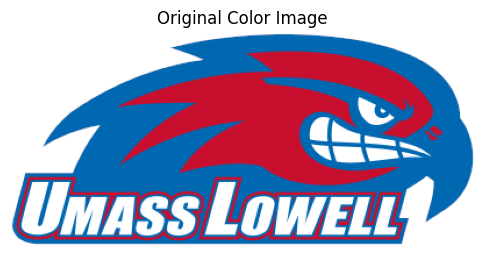

In [ ]:
# Define the filename of the color image
color_image_filename = "uml_river_hawk_color.bmp"

# Read the color image
img_color = cv2.imread(color_image_filename, cv2.IMREAD_COLOR)

# OpenCV loads images in BGR format, so converting to RGB for proper display
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Display the original color image
plt.figure(figsize=(6, 6))
plt.title("Original Color Image")
plt.imshow(img_color_rgb)
plt.axis('off')
plt.show()

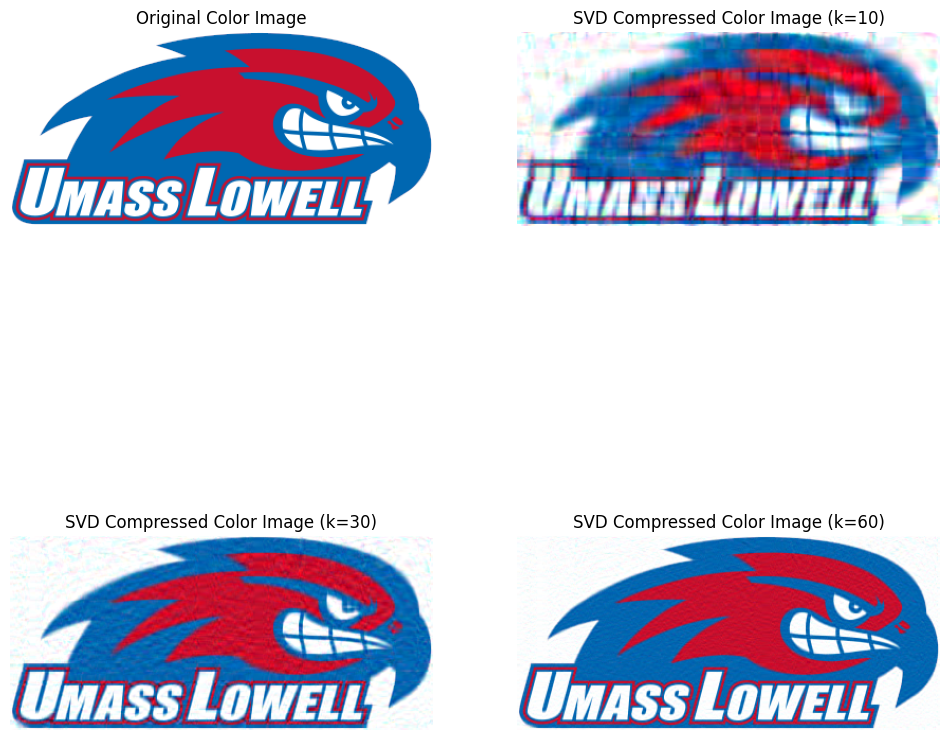

In [ ]:
# Apply SVD compression to the color image
k_color_values = [10, 30, 60]

plt.figure(figsize=(12, 12))

# Display the original color image
plt.subplot(2, 2, 1)
plt.title("Original Color Image")
plt.imshow(img_color_rgb)
plt.axis('off')

for i, k_color in enumerate(k_color_values):
    compressed_img_color = svd_compress_color_image(img_color, k_color)

    # Convert compressed image back to RGB for display
    compressed_img_color_rgb = cv2.cvtColor(compressed_img_color, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i + 2)
    plt.title(f"SVD Compressed Color Image (k={k_color})")
    plt.imshow(compressed_img_color_rgb)
    plt.axis('off')

plt.show()

In [ ]:
# Compute relative error and compression ratio for color image
def compute_color_metrics(img_color, k):
    # Split the image into color channels
    b, g, r = cv2.split(img_color)

    # Compute metrics for each channel
    relative_error_b, compression_ratio_b = compute_metrics(b, k)
    relative_error_g, compression_ratio_g = compute_metrics(g, k)
    relative_error_r, compression_ratio_r = compute_metrics(r, k)

    # You might consider averaging or reporting metrics for each channel
    # For simplicity, let's average the relative error and compression ratio here
    avg_relative_error = (relative_error_b + relative_error_g + relative_error_r) / 3
    avg_compression_ratio = (compression_ratio_b + compression_ratio_g + compression_ratio_r) / 3 # Note: this is not the actual compression ratio for the color image, but an average of the channel ratios.

    # A more accurate color image compression ratio calculation:
    original_size_color = img_color.shape[0] * img_color.shape[1] * img_color.shape[2]
    compressed_size_color = 3 * ((img_color.shape[0] * k) + k + (k * img_color.shape[1]))
    actual_compression_ratio = original_size_color / compressed_size_color


    return avg_relative_error, actual_compression_ratio

k_values_color_metrics = [10, 30, 60]
metrics_color = []
for k in k_values_color_metrics:
    relative_error_color, compression_ratio_color = compute_color_metrics(img_color, k)
    metrics_color.append({'k': k, 'Average Relative Error (σk+1/σ1)': relative_error_color, 'Actual Compression Ratio': compression_ratio_color})

metrics_color_df = pd.DataFrame(metrics_color)
display(metrics_color_df)

k  Average Relative Error (σk+1/σ1)  Actual Compression Ratio
0  10                          0.072716                 12.581197
1  30                          0.023005                  4.193732
2  60                          0.009557                  2.096866

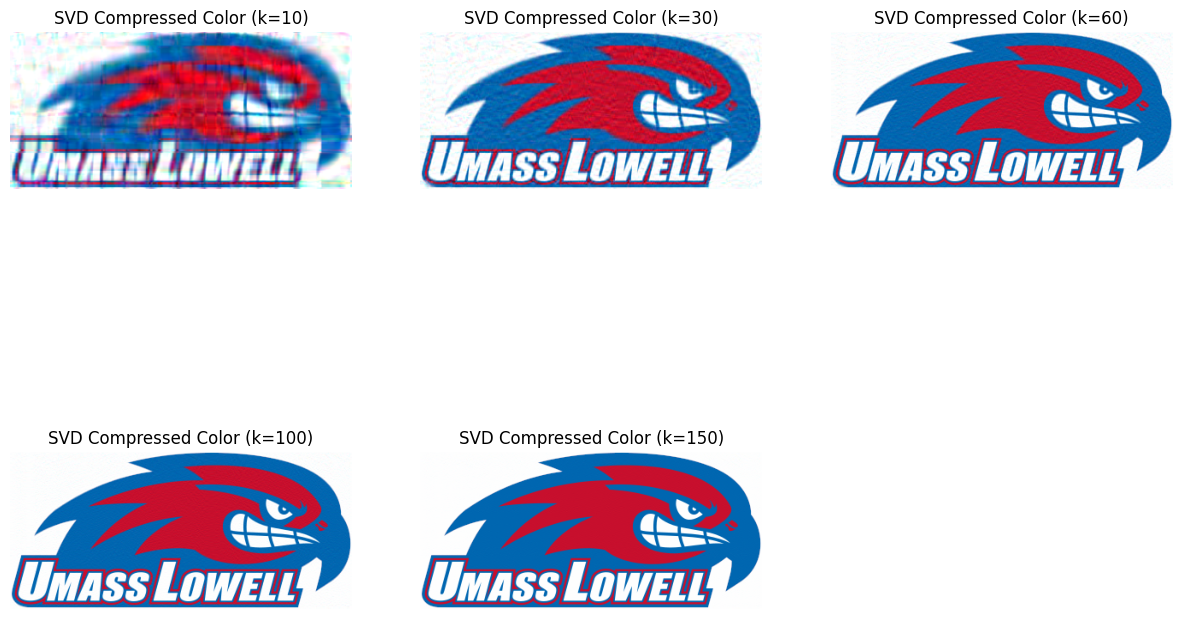

In [ ]:
k_values_color_experiment = [5, 10, 20, 40, 80,150] # Experiment with different k values for color image

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values_color_experiment):
    compressed_img_color_exp = svd_compress_color_image(img_color, k)
    compressed_img_color_exp_rgb = cv2.cvtColor(compressed_img_color_exp, cv2.COLOR_BGR2RGB)


    plt.subplot(2, 3, i + 1)
    plt.title(f"SVD Compressed Color (k={k})")
    plt.imshow(compressed_img_color_exp_rgb)
    plt.axis('off')

plt.show()

In [ ]:
k_color_chosen = 150
relative_error_color_chosen, compression_ratio_color_chosen = compute_color_metrics(img_color, k_color_chosen)

metrics_color_chosen = [{'k': k_color_chosen, 'Average Relative Error (σk+1/σ1)': relative_error_color_chosen, 'Actual Compression Ratio': compression_ratio_color_chosen}]
metrics_color_chosen_df = pd.DataFrame(metrics_color_chosen)
display(metrics_color_chosen_df)

k  Average Relative Error (σk+1/σ1)  Actual Compression Ratio
0  150                          0.001966                  0.838746


We applied SVD compression to a color image ("uml_river_hawk_color.bmp") now.  


For the color image with a chosen k=150:
- The average relative error across channels was .0003
- The actual compression ratio was .839.  
- Visually, the compressed image was very close to the original.  
